# Veri Bilimi Projesi: Model Karşılaştırma ve Analiz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import GradientBoostingRegressor

## 1. Veri Setinin Hazırlanması

### - Veri setini yükleyin ve ilk 5 satırını inceleyin.

In [3]:
df = pd.read_excel('energy_efficiency_dataset.xlsx')
df.to_csv("energy_efficiency_dataset.csv", index=False)
print("Excel dosyası CSV'ye dönüştürüldü.")

Excel dosyası CSV'ye dönüştürüldü.


In [4]:
df = pd.read_csv('energy_efficiency_dataset.csv')
df = df.copy() 

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### - Veri setinin özet istatistiklerini çıkarın (ör. describe(), info()).

| Özellik  | Tür      | Tip        | Açıklama                     | Hedef? | Ne İşe Yarar? |
|----------|----------|------------|------------------------------|--------|----------------|
| X1       | Özellik | Sürekli    | Göreceli Yoğunluk            | Hayır  | Binanın şekil yoğunluğunu belirler. Bu değer, binanın yüksekliği ve taban alanı arasındaki orana dayanır. Daha kompakt bir yapı, enerji verimliliği açısından genellikle daha iyidir. |
| X2       | Özellik | Sürekli    | Yüzey Alanı                  | Hayır  | Binanın dış yüzey alanını belirtir. Bu, enerji kaybını ve ısıtma/soğutma ihtiyacını etkileyen önemli bir faktördür. |
| X3       | Özellik | Sürekli    | Duvar Alanı                  | Hayır  | Binanın duvarlarının toplam alanını belirtir. Bu değer ısı kaybını etkileyen faktörlerden biridir. |
| X4       | Özellik | Sürekli    | Çatı Alanı                   | Hayır  | Binanın çatı alanını belirtir. Çatı, ısı kaybı ve güneş ışığı alma açısından önemli bir faktördür. |
| X5       | Özellik | Sürekli    | Genel Yükseklik              | Hayır  | Binanın toplam yüksekliğini belirtir. Yükseklik, enerji verimliliğini etkileyen bir faktör olabilir, çünkü yüksek binalarda hava akışı ve ısı kaybı farklı olabilir. |
| X6       | Özellik | Tam Sayı   | Yön                          | Hayır  | Binanın yönünü belirtir (örneğin, kuzey-güney-doğu-batı). Yön, binanın güneş ışığını ne kadar aldığı ve ısıtma-soğutma ihtiyacını doğrudan etkileyebilir. |
| X7       | Özellik | Sürekli    | Cam Alanı                    | Hayır  | Binanın cam yüzeylerinin toplam alanını belirtir. Cam alanı, doğal ışık alımını ve enerji kaybını etkileyen önemli bir faktördür. |
| X8       | Özellik | Tam Sayı   | Cam Alanı Dağılımı           | Hayır  | Binadaki cam yüzeylerinin yerleşim düzenini belirtir. Cam alanı ve dağılımı, binanın ısıtma ve soğutma ihtiyacını etkileyebilir. |
| <span style="color:red">Y1</span>       | Hedef   | Sürekli    | Isıtma Yükü                  | <span style="color:red">Evet</span>   | Binanın ısıtma için gerekli enerji miktarını belirler. Bu, enerji verimliliği modelinde hedef değişkenidir. |
| <span style="color:blue">Y2</span>       | Hedef   | Sürekli    | Soğutma Yükü                 | <span style="color:blue">Evet</span>   | Binanın soğutma için gerekli enerji miktarını belirler. Bu da enerji verimliliği modelinin hedef değişkenlerinden biridir. |

In [8]:
df.info()
# Benzersiz değerler
for column in df.columns:
    unique_values = df[column].unique()
    num_unique_values = len(unique_values)
    print(f"\n{column} sütunundaki benzersiz değer sayısı: {num_unique_values}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB

X1 sütunundaki benzersiz değer sayısı: 12

X2 sütunundaki benzersiz değer sayısı: 12

X3 sütunundaki benzersiz değer sayısı: 7

X4 sütunundaki benzersiz değer sayısı: 4

X5 sütunundaki benzersiz değer sayısı: 2

X6 sütunundaki benzersiz değer sayısı: 4

X7 sütunundaki benzersiz değer sayısı: 4

X8 sütunundaki benzersiz değer sayısı: 6

Y1 sütunundaki benzersiz değer sayısı: 587

Y2 sütunundaki be

### - Özelliklerin istatistiksel özetlerini (ör. ortalama, standart sapma) ve tüm veri yapısını analiz edin.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


### - Hedef değişkenin ve bağımsız değişkenlerin dağılımını görselleştirin.

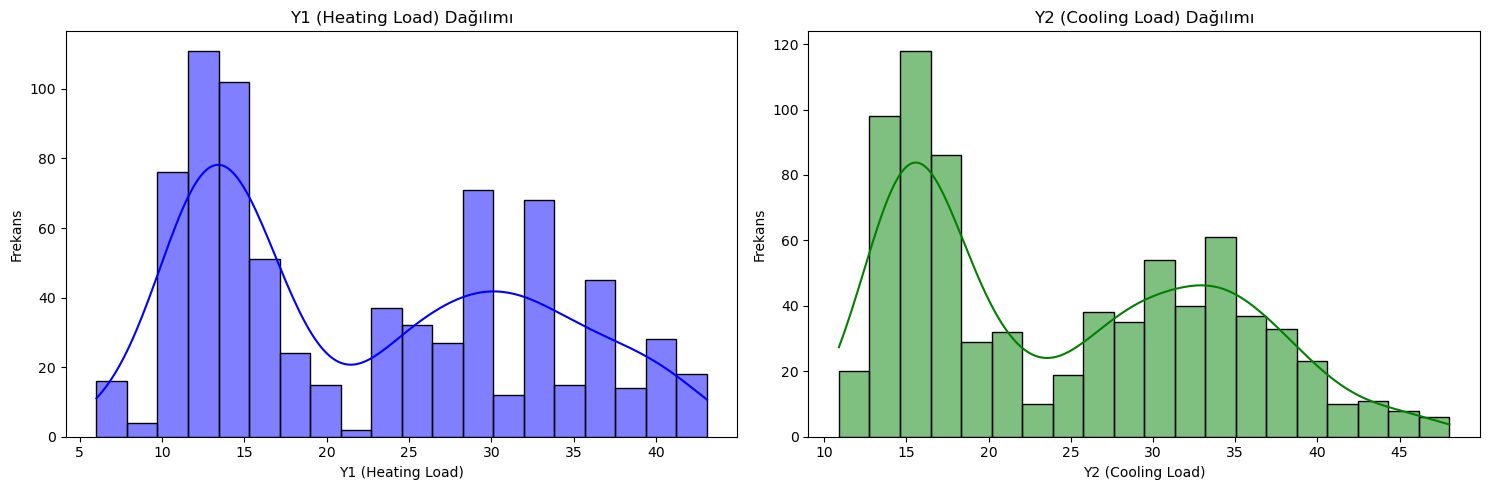

In [18]:
# KDE, "Kernel Density Estimate" (Çekirdek Yoğunluk Tahmini): Histogramın üzerine, verinin yoğunluk eğrisini ekler. 
# bin: Histogramın kaç aralık (bin) kullanılacağını belirtir.

plt.figure(figsize=(15, 5))

# Y1 için histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Y1'], kde=True, color='blue', bins=20)
plt.title('Y1 (Heating Load) Dağılımı')
plt.xlabel('Y1 (Heating Load)')
plt.ylabel('Frekans')

# Y2 için histogram
plt.subplot(1, 2, 2)
sns.histplot(df['Y2'], kde=True, color='green', bins=20)
plt.title('Y2 (Cooling Load) Dağılımı')
plt.xlabel('Y2 (Cooling Load)')
plt.ylabel('Frekans')

plt.tight_layout()  # Grafiğin düzenini optimize eder
plt.show()          # Grafiği ekranda görüntüler


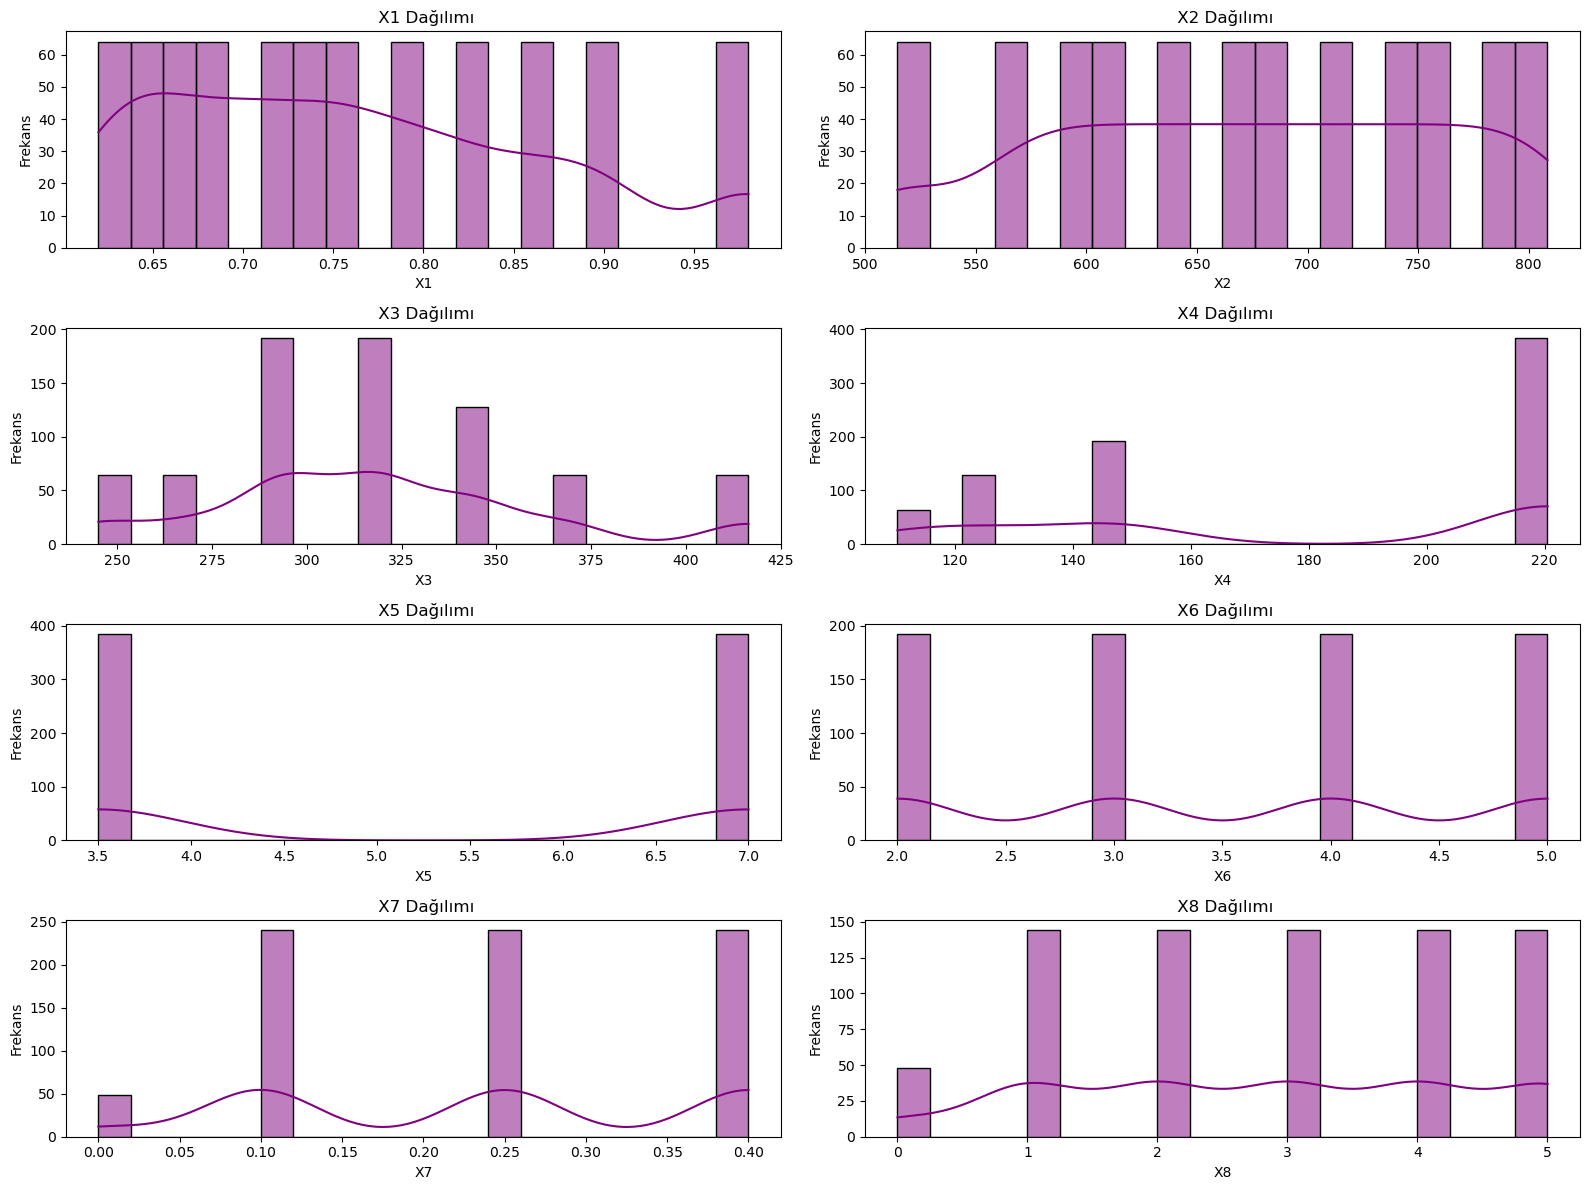

In [20]:
independent_vars = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

plt.figure(figsize=(16, 12))
for i, col in enumerate(independent_vars, 1): # Değişkenleri sıralı bir şekilde döngüye alır.
    plt.subplot(4, 2, i)  # 4 satır, 2 sütun düzeninde grafik oluştur
    sns.histplot(df[col], kde=True, color='purple', bins=20)
    plt.title(f' {col} Dağılımı')
    plt.xlabel(col)
    plt.ylabel('Frekans')

plt.tight_layout()
plt.show()


## 2. Veri Ön İşleme

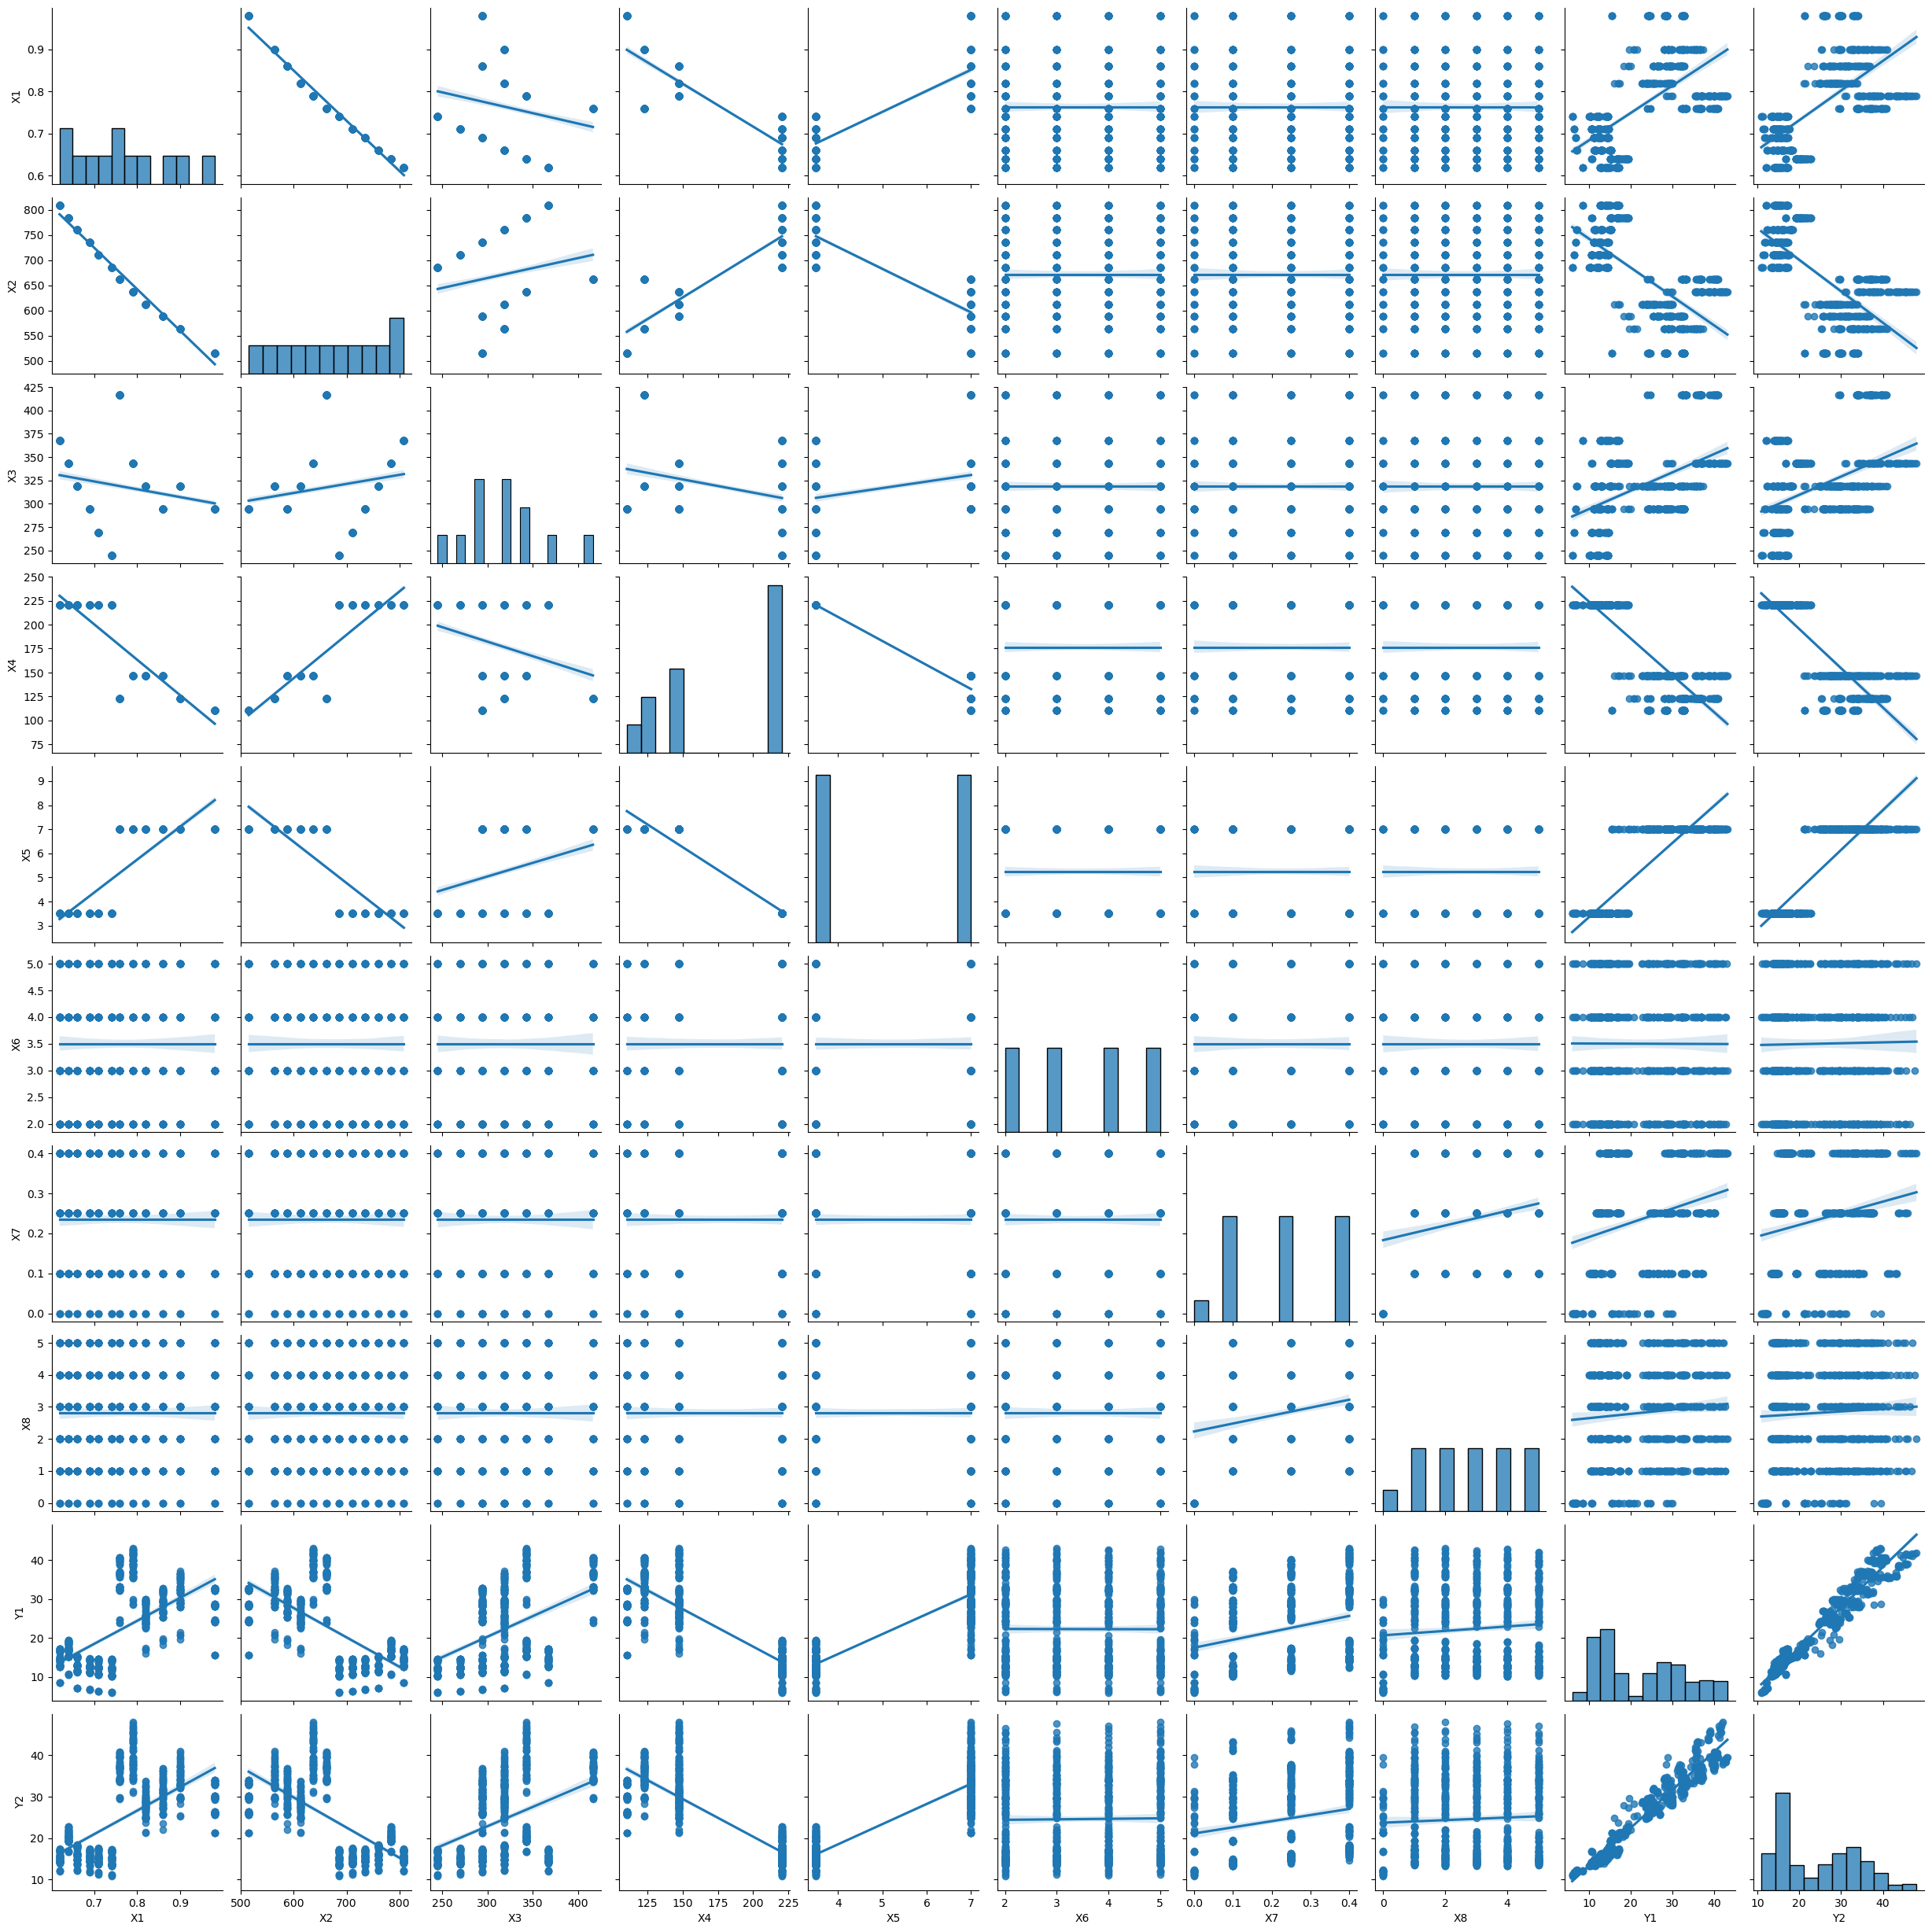

In [23]:
sns.pairplot(df, kind  ="reg");

### - Eksik Veriler:

In [26]:
df.isnull().values.any()

False

In [28]:
missing_values = df.isnull().sum() #Eksik veri kontrol etme
print(missing_values)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


### - Aykırı Veriler:

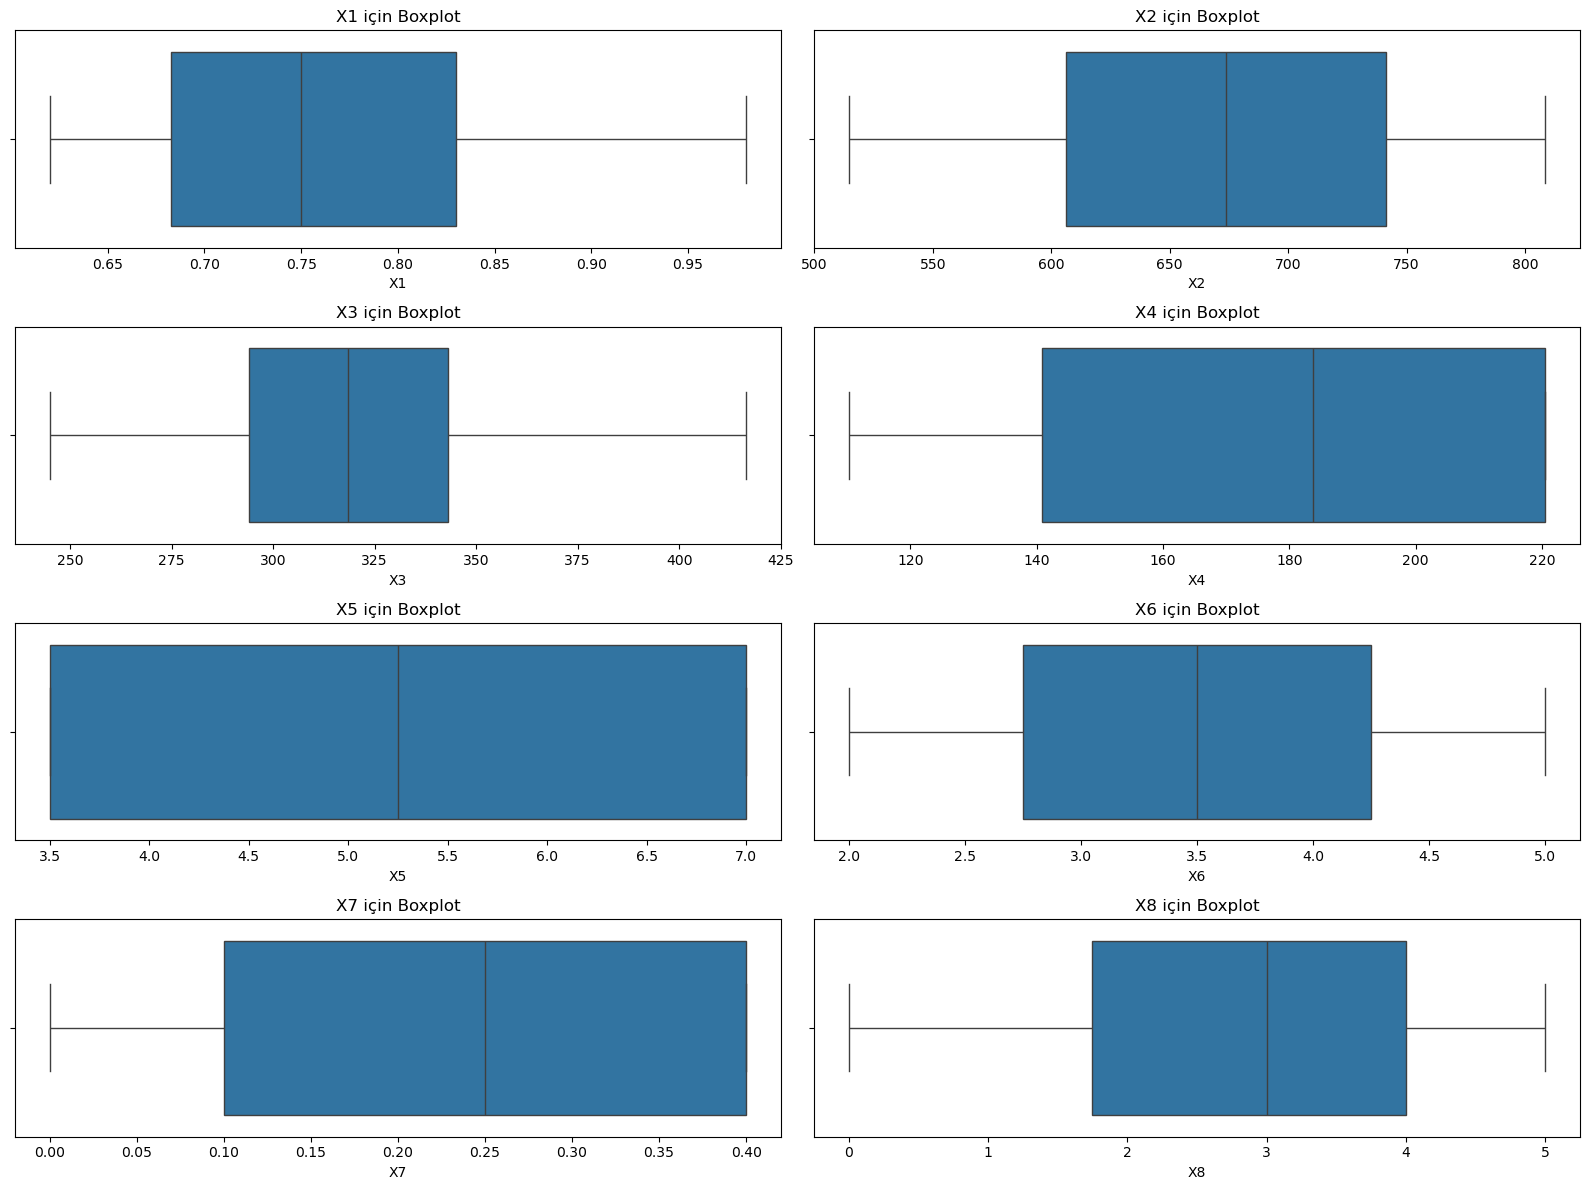

In [31]:
# Her bir sütun için ayrı ayrı boxplot çizimi
plt.figure(figsize=(16, 12))  # Genel figür boyutu
for i, col in enumerate(independent_vars, 1):  # Daha önce tanımlanmış independent_vars'i kullan
    plt.subplot(4, 2, i)  # 4 satır, 2 sütun düzeninde grafik oluştur
    sns.boxplot(x=df[col])  # Boxplot çiz
    plt.title(f'{col} için Boxplot')  # Başlık ekle
    plt.xlabel(col)  # X eksen etiketi

plt.tight_layout()
plt.show()


In [33]:
# IQR yöntemi ile aykırı değer tespiti
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    Q1 = df[col].quantile(0.25)  # 1. çeyrek (Q1)
    Q3 = df[col].quantile(0.75)  # 3. çeyrek (Q3)
    IQR = Q3 - Q1  # IQR hesaplama
    alt_sinir = Q1 - 1.5 * IQR  # Alt sınır
    ust_sinir = Q3 + 1.5 * IQR  # Üst sınır

    # Aykırı değer tespiti
    outliers = df[(df[col] < alt_sinir) | (df[col] > ust_sinir)]
    print(f"{col} sütununda aykırı değer sayısı: {outliers.shape[0]}")


X1 sütununda aykırı değer sayısı: 0
X2 sütununda aykırı değer sayısı: 0
X3 sütununda aykırı değer sayısı: 0
X4 sütununda aykırı değer sayısı: 0
X5 sütununda aykırı değer sayısı: 0
X6 sütununda aykırı değer sayısı: 0
X7 sütununda aykırı değer sayısı: 0
X8 sütununda aykırı değer sayısı: 0
Y1 sütununda aykırı değer sayısı: 0
Y2 sütununda aykırı değer sayısı: 0


In [35]:
#LOF algoritması, her bir veri noktası için bir outlier score (aykırı skor) hesaplar.

#Bu skor, negatif bir değer olarak ifade edilir:

#Daha düşük bir değer (örneğin, -10) → Veri noktası daha aykırı.
#Daha yüksek bir değer (örneğin, -1) → Veri noktası normal (aykırı değil).
#Skorlar negatif olmasına rağmen, negatiflik düzeyi, bir veri noktasının komşularına göre ne kadar aykırı olduğunu gösterir.

# Local Outlier Factor modeli
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# LOF skorlarını hesapla
clf.fit_predict(df)  # df, senin veri setin olmalı
lof_scores = clf.negative_outlier_factor_

# Skorları sıralayıp ilk 20 tanesini incele
sorted_scores = np.sort(lof_scores)
print("İlk 20 LOF Skoru (Aykırılık Durumu):", sorted_scores[:20])

# En yüksek skor
print("En yüksek LOF skoru (en normal nokta):", sorted_scores[-1])

# En düşük skor
print("En düşük LOF skoru (en aykırı nokta):", sorted_scores[0])


İlk 20 LOF Skoru (Aykırılık Durumu): [-2.31044329 -2.23091633 -2.20767261 -2.20261879 -2.19907278 -2.18297407
 -2.16844099 -2.15858051 -2.13911278 -2.12365601 -2.10501735 -2.08616618
 -2.08124336 -2.07936756 -2.07859738 -2.07421661 -2.0731053  -2.0668312
 -2.06028369 -2.05814289]
En yüksek LOF skoru (en normal nokta): -0.9387625827237537
En düşük LOF skoru (en aykırı nokta): -2.3104432857594444


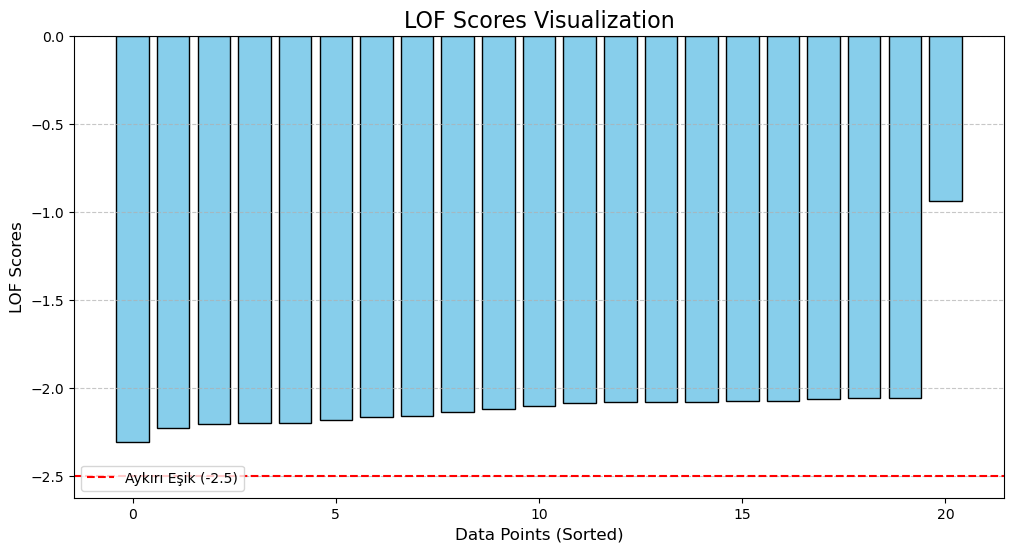

In [37]:
#LOF scores example based on user's data
lof_scores = np.array([-2.31044329, -2.23091633, -2.20767261, -2.20261879, -2.19907278, 
                       -2.18297407, -2.16844099, -2.15858051, -2.13911278, -2.12365601, 
                       -2.10501735, -2.08616618, -2.08124336, -2.07936756, -2.07859738, 
                       -2.07421661, -2.0731053, -2.0668312, -2.06028369, -2.05814289, 
                       -0.9387625827237537])

# Plotting LOF scores as a bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(lof_scores)), np.sort(lof_scores), color='skyblue', edgecolor='black')
plt.title("LOF Scores Visualization", fontsize=16)
plt.xlabel("Data Points (Sorted)", fontsize=12)
plt.ylabel("LOF Scores", fontsize=12)
plt.axhline(y=-2.5, color='red', linestyle='--', label="Aykırı Eşik (-2.5)")
plt.legend() #Grafikteki elemanların (örneğin, eşik çizgisi) açıklamasını gösterir.
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### - Kategorik Değişkenlerin Dönüştürülmesi:

In [40]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Kategorik Değişkenler:", categorical_columns)

Kategorik Değişkenler: Index([], dtype='object')


### - Scaling/Normalization:

In [43]:
# Bağımsız değişkenleri (özellikler) ve bağımlı değişkenleri ayıralım
X = df[independent_vars]  # Bağımsız değişkenler (X1, X2, ..., X8)
y1 = df['Y1']  # Isıtma yükü (Y1)
y2 = df['Y2']  # Soğutma yükü (Y2)

In [45]:
# Veriyi standardize etmek için StandardScaler 
scaler = StandardScaler()
# Bağımsız değişkenleri ölçeklendirme
X_scaled = scaler.fit_transform(X)
# Standardize edilmiş veriyi X_scaled olarak kullanacağız

### - Yeni Özniteliklerin Oluşturulması:

In [48]:
# Toplam Alan: Duvar Alanı + Çatı Alanı
df['Toplam_Alan'] = df['X3'] + df['X4']

# Pencere Oranı: Cam Alanı / Toplam Alan
df['Pencere_Orani'] = df['X7'] / df['Toplam_Alan']

# Yükseklik-Genişlik Oranı: Toplam Yükseklik / (Yüzey Alanı / Toplam Yükseklik)
# (Yüzey Alanı / Toplam Yükseklik) yaklaşık olarak genişliği temsil eder.
df['Yukseklik_Genislik_Orani'] = df['X5'] / (df['X2'] / df['X5'])

# Kompaktlık Endeksi: Yüzey Alanı / Hacim (Hacim = Yüzey Alanı * Toplam Yükseklik)
df['Kompaktlik_Endeksi'] = df['X2'] / (df['X2'] * df['X5'])

# Toplam Enerji Yükü: Isıtma Yükü + Soğutma Yükü
#df['Toplam_Enerji_Yuku'] = df['Y1'] + df['Y2']

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Toplam_Alan,Pencere_Orani,Yukseklik_Genislik_Orani,Kompaktlik_Endeksi
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,404.25,0.0,0.095238,0.142857
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,404.25,0.0,0.095238,0.142857
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,404.25,0.0,0.095238,0.142857
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,404.25,0.0,0.095238,0.142857
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,441.00,0.0,0.086957,0.142857


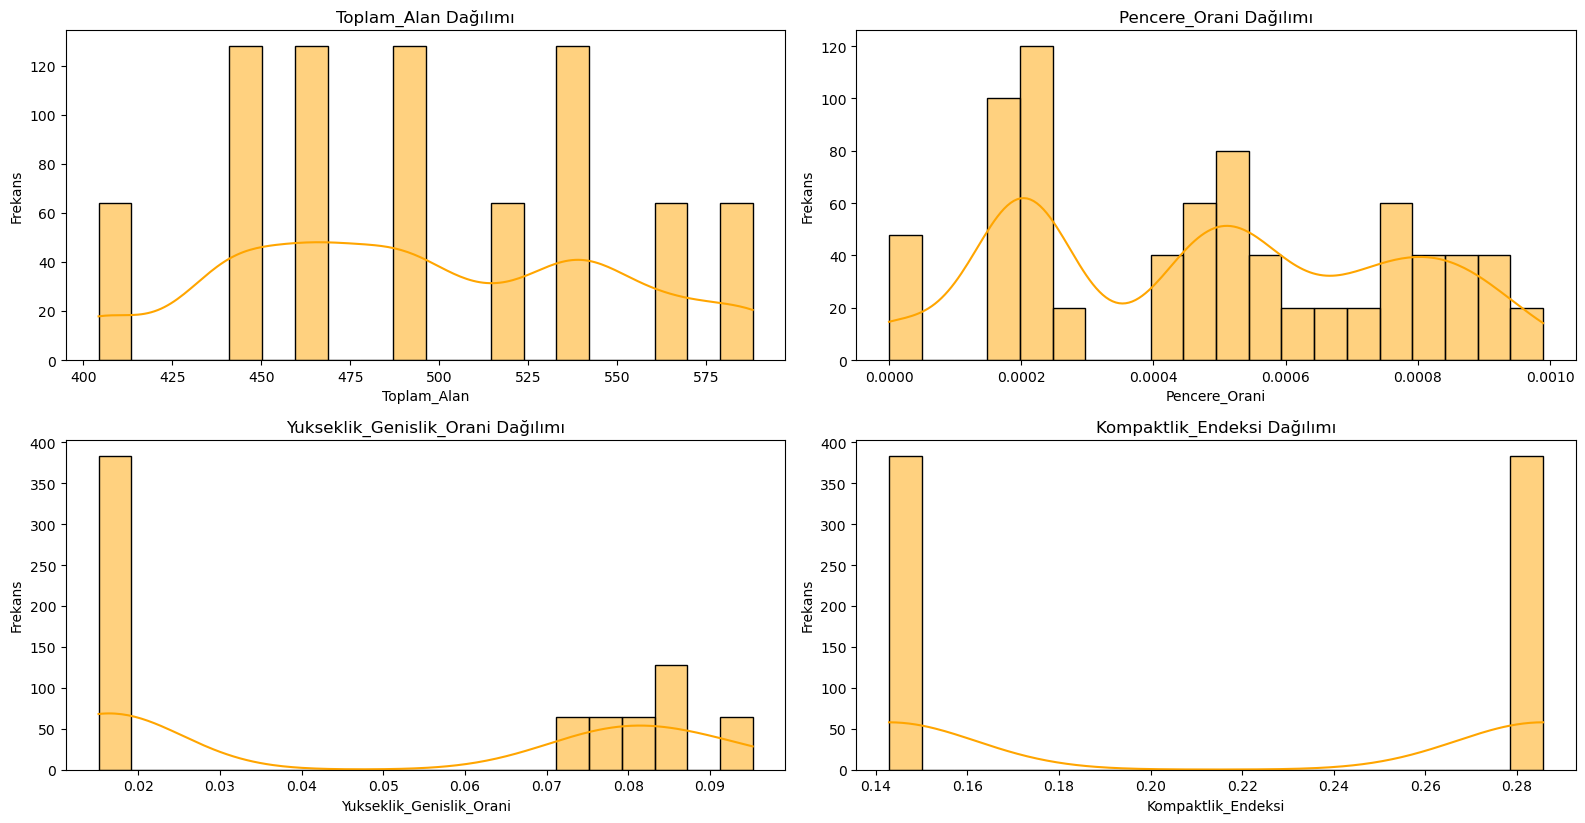

In [50]:
# Yeni özniteliklerin dağılımlarını görselleştirme
new_features = ['Toplam_Alan', 'Pencere_Orani', 'Yukseklik_Genislik_Orani', 'Kompaktlik_Endeksi']

plt.figure(figsize=(16, 12))
for i, col in enumerate(new_features, 1):
    plt.subplot(3, 2, i)  # 3 satır, 2 sütun düzeninde grafik oluştur
    sns.histplot(df[col], kde=True, color='orange', bins=20)
    plt.title(f'{col} Dağılımı')
    plt.xlabel(col)
    plt.ylabel('Frekans')

plt.tight_layout()
plt.show()


In [52]:
# Bağımsız değişkenler (hem orijinal hem de yeni oluşturduğunuz öznitelikler)
independent_vars_all = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Toplam_Alan', 'Pencere_Orani', 
                        'Yukseklik_Genislik_Orani', 'Kompaktlik_Endeksi']


# Bağımsız değişkenlerin sadece sayısal olanlarını alıyoruz.
X_all = df[independent_vars_all]

# StandardScaler ile veriyi standartlaştırma
scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X_all)

# Standartlaştırılmış veriyi DataFrame'e çevirme ve orijinal veriyle birleştirme
X_scaled_all_df = pd.DataFrame(X_scaled_all, columns=X_all.columns)

# İlk birkaç satırını görüntüleyelim
X_scaled_all_df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Toplam_Alan,Pencere_Orani,Yukseklik_Genislik_Orani,Kompaktlik_Endeksi
0,2.041777,-1.785875,-0.561951,-1.470077,1.0,-1.341641,-1.760447,-1.814575,-1.720791,-1.720225,1.361353,-1.0
1,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,-1.760447,-1.814575,-1.720791,-1.720225,1.361353,-1.0
2,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,-1.760447,-1.814575,-1.720791,-1.720225,1.361353,-1.0
3,2.041777,-1.785875,-0.561951,-1.470077,1.0,1.341641,-1.760447,-1.814575,-1.720791,-1.720225,1.361353,-1.0
4,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.760447,-1.814575,-1.024741,-1.720225,1.114321,-1.0


## 3. Veri Setinin Bölünmesi

In [55]:
# Bağımsız değişkenler
X = X_scaled_all_df  # Standartlaştırılmış bağımsız değişkenler

# Y1 ve Y2'yi ayrı ayrı alalım
y1 = df['Y1']  # Isıtma Yükü
y2 = df['Y2']  # Soğutma Yükü

# Y1 için eğitim ve test kümesine ayırma
X_train_y1, X_test_y1, y_train_y1, y_test_y1 = train_test_split(X, y1, test_size=0.2, random_state=42)

# Y2 için eğitim ve test kümesine ayırma
X_train_y2, X_test_y2, y_train_y2, y_test_y2 = train_test_split(X, y2, test_size=0.2, random_state=42)

# Eğitim ve test kümelerinin boyutlarını kontrol edelim
print("Y1 - Eğitim kümesi boyutu:", X_train_y1.shape)
print("Y1 - Test kümesi boyutu:", X_test_y1.shape)

print("Y2 - Eğitim kümesi boyutu:", X_train_y2.shape)
print("Y2 - Test kümesi boyutu:", X_test_y2.shape)

Y1 - Eğitim kümesi boyutu: (614, 12)
Y1 - Test kümesi boyutu: (154, 12)
Y2 - Eğitim kümesi boyutu: (614, 12)
Y2 - Test kümesi boyutu: (154, 12)


## 4. Model Kurulumu

In [58]:
# Model 1: Random Forest Regressor
rf_model_y1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_y2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Model 2: Support Vector Regressor (SVR)
svr_model_y1 = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model_y2 = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Model 3: Gradient Boosting Regressor
gbr_model_y1 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model_y2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Model 4: Decision Tree Regressor
dtr_model_y1 = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr_model_y2 = DecisionTreeRegressor(max_depth=5, random_state=42)


# Model Eğitimi

# Random Forest Modeli Eğitme
rf_model_y1.fit(X_train_y1, y_train_y1)
rf_model_y2.fit(X_train_y2, y_train_y2)

# Support Vector Regressor Modeli Eğitme
svr_model_y1.fit(X_train_y1, y_train_y1)
svr_model_y2.fit(X_train_y2, y_train_y2)

# Gradient Boosting Regressor Modeli Eğitme
gbr_model_y1.fit(X_train_y1, y_train_y1)
gbr_model_y2.fit(X_train_y2, y_train_y2)

# Decision Tree Modeli Eğitme
dtr_model_y1.fit(X_train_y1, y_train_y1)
dtr_model_y2.fit(X_train_y2, y_train_y2)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [59]:
# Model Tahminleri

# Random Forest Tahminleri
rf_y1_pred = rf_model_y1.predict(X_test_y1)
rf_y2_pred = rf_model_y2.predict(X_test_y2)

# Support Vector Regressor Tahminleri
svr_y1_pred = svr_model_y1.predict(X_test_y1)
svr_y2_pred = svr_model_y2.predict(X_test_y2)

# Gradient Boosting Regressor Tahminleri
gbr_y1_pred = gbr_model_y1.predict(X_test_y1)
gbr_y2_pred = gbr_model_y2.predict(X_test_y2)

# Decision Tree Tahminleri
dtr_y1_pred = dtr_model_y1.predict(X_test_y1)
dtr_y2_pred = dtr_model_y2.predict(X_test_y2)

In [62]:
# Performans Metrikleri: MSE, R2, RMSE, MAE

# Random Forest Değerlendirme
rf_mse_y1 = mean_squared_error(y_test_y1, rf_y1_pred)
rf_r2_y1 = r2_score(y_test_y1, rf_y1_pred)
rf_rmse_y1 = np.sqrt(rf_mse_y1)
rf_mae_y1 = mean_absolute_error(y_test_y1, rf_y1_pred)

rf_mse_y2 = mean_squared_error(y_test_y2, rf_y2_pred)
rf_r2_y2 = r2_score(y_test_y2, rf_y2_pred)
rf_rmse_y2 = np.sqrt(rf_mse_y2)
rf_mae_y2 = mean_absolute_error(y_test_y2, rf_y2_pred)

# SVR Değerlendirme
svr_mse_y1 = mean_squared_error(y_test_y1, svr_y1_pred)
svr_r2_y1 = r2_score(y_test_y1, svr_y1_pred)
svr_rmse_y1 = np.sqrt(svr_mse_y1)
svr_mae_y1 = mean_absolute_error(y_test_y1, svr_y1_pred)

svr_mse_y2 = mean_squared_error(y_test_y2, svr_y2_pred)
svr_r2_y2 = r2_score(y_test_y2, svr_y2_pred)
svr_rmse_y2 = np.sqrt(svr_mse_y2)
svr_mae_y2 = mean_absolute_error(y_test_y2, svr_y2_pred)

# Gradient Boosting Değerlendirme
gbr_mse_y1 = mean_squared_error(y_test_y1, gbr_y1_pred)
gbr_r2_y1 = r2_score(y_test_y1, gbr_y1_pred)
gbr_rmse_y1 = np.sqrt(gbr_mse_y1)
gbr_mae_y1 = mean_absolute_error(y_test_y1, gbr_y1_pred)

gbr_mse_y2 = mean_squared_error(y_test_y2, gbr_y2_pred)
gbr_r2_y2 = r2_score(y_test_y2, gbr_y2_pred)
gbr_rmse_y2 = np.sqrt(gbr_mse_y2)
gbr_mae_y2 = mean_absolute_error(y_test_y2, gbr_y2_pred)

# Decision Tree Değerlendirme
dtr_mse_y1 = mean_squared_error(y_test_y1, dtr_y1_pred)
dtr_r2_y1 = r2_score(y_test_y1, dtr_y1_pred)
dtr_rmse_y1 = np.sqrt(dtr_mse_y1)
dtr_mae_y1 = mean_absolute_error(y_test_y1, dtr_y1_pred)

dtr_mse_y2 = mean_squared_error(y_test_y2, dtr_y2_pred)
dtr_r2_y2 = r2_score(y_test_y2, dtr_y2_pred)
dtr_rmse_y2 = np.sqrt(dtr_mse_y2)
dtr_mae_y2 = mean_absolute_error(y_test_y2, dtr_y2_pred)

# Sonuçları yazdırma
print("Random Forest Model Değerlendirme:")
print(f"Y1 - MSE: {rf_mse_y1}, R²: {rf_r2_y1}, RMSE: {rf_rmse_y1}, MAE: {rf_mae_y1}")
print(f"Y2 - MSE: {rf_mse_y2}, R²: {rf_r2_y2}, RMSE: {rf_rmse_y2}, MAE: {rf_mae_y2}")

print("\nSupport Vector Regressor Model Değerlendirme:")
print(f"Y1 - MSE: {svr_mse_y1}, R²: {svr_r2_y1}, RMSE: {svr_rmse_y1}, MAE: {svr_mae_y1}")
print(f"Y2 - MSE: {svr_mse_y2}, R²: {svr_r2_y2}, RMSE: {svr_rmse_y2}, MAE: {svr_mae_y2}")

print("\nGradient Boosting Regressor Model Değerlendirme:")
print(f"Y1 - MSE: {gbr_mse_y1}, R²: {gbr_r2_y1}, RMSE: {gbr_rmse_y1}, MAE: {gbr_mae_y1}")
print(f"Y2 - MSE: {gbr_mse_y2}, R²: {gbr_r2_y2}, RMSE: {gbr_rmse_y2}, MAE: {gbr_mae_y2}")

print("\nDecision Tree Regressor Model Değerlendirme:")
print(f"Y1 - MSE: {dtr_mse_y1}, R²: {dtr_r2_y1}, RMSE: {dtr_rmse_y1}, MAE: {dtr_mae_y1}")
print(f"Y2 - MSE: {dtr_mse_y2}, R²: {dtr_r2_y2}, RMSE: {dtr_rmse_y2}, MAE: {dtr_mae_y2}")



Random Forest Model Değerlendirme:
Y1 - MSE: 0.22658088850649177, R²: 0.9978261954216769, RMSE: 0.4760051349581134, MAE: 0.3406071428571418
Y2 - MSE: 3.3147801883766235, R²: 0.9642253503253791, RMSE: 1.8206537804801393, MAE: 1.1372032467532454

Support Vector Regressor Model Değerlendirme:
Y1 - MSE: 7.583733444002477, R²: 0.9272420785794488, RMSE: 2.7538579200827478, MAE: 1.8497526925174794
Y2 - MSE: 10.054894070772514, R²: 0.89148290611889, RMSE: 3.1709452960864075, MAE: 2.0548424989980734

Gradient Boosting Regressor Model Değerlendirme:
Y1 - MSE: 0.2511324856564794, R²: 0.9975906487493977, RMSE: 0.5011312060293984, MAE: 0.39056420994357255
Y2 - MSE: 2.0446420148868896, R²: 0.9779332723029179, RMSE: 1.4299097925697584, MAE: 0.9812400797029902

Decision Tree Regressor Model Değerlendirme:
Y1 - MSE: 0.9038282877766154, R²: 0.9913287211338199, RMSE: 0.9506988417877742, MAE: 0.6287230230420909
Y2 - MSE: 3.863233768215306, R²: 0.9583061841766488, RMSE: 1.965511070489125, MAE: 1.2486920348

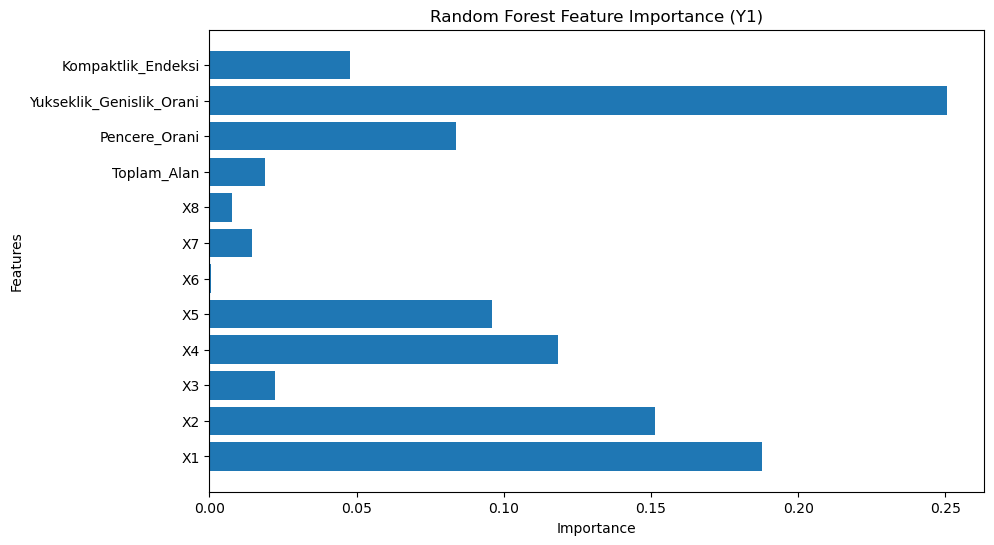

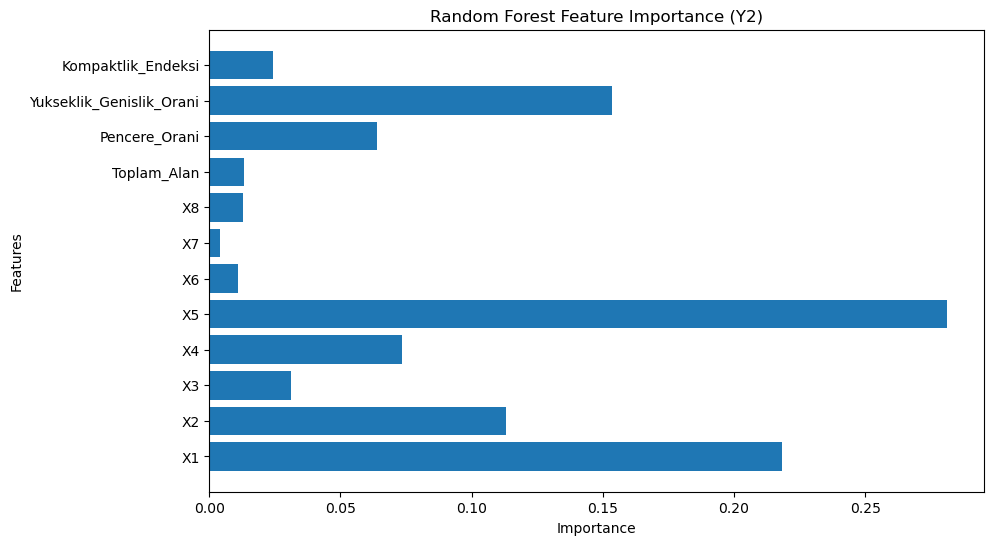

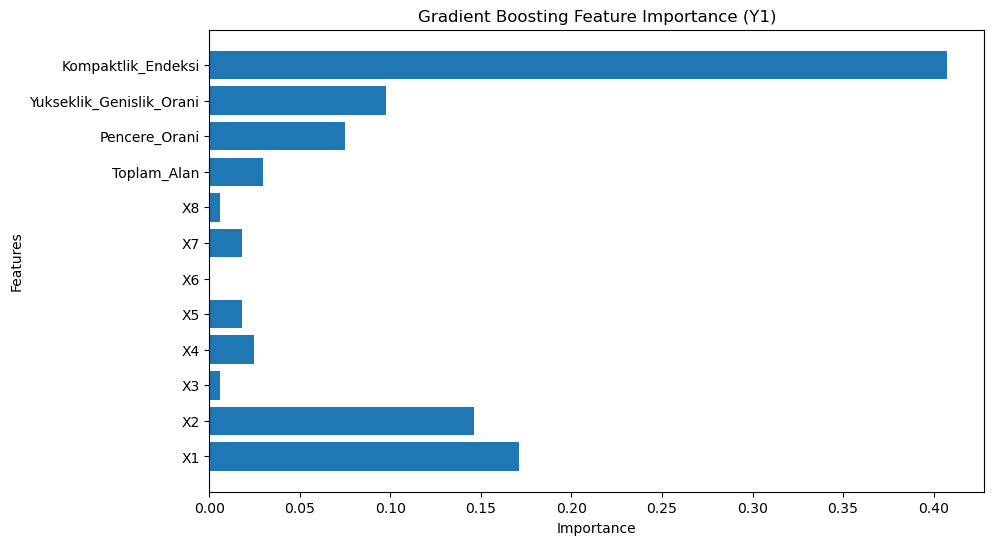

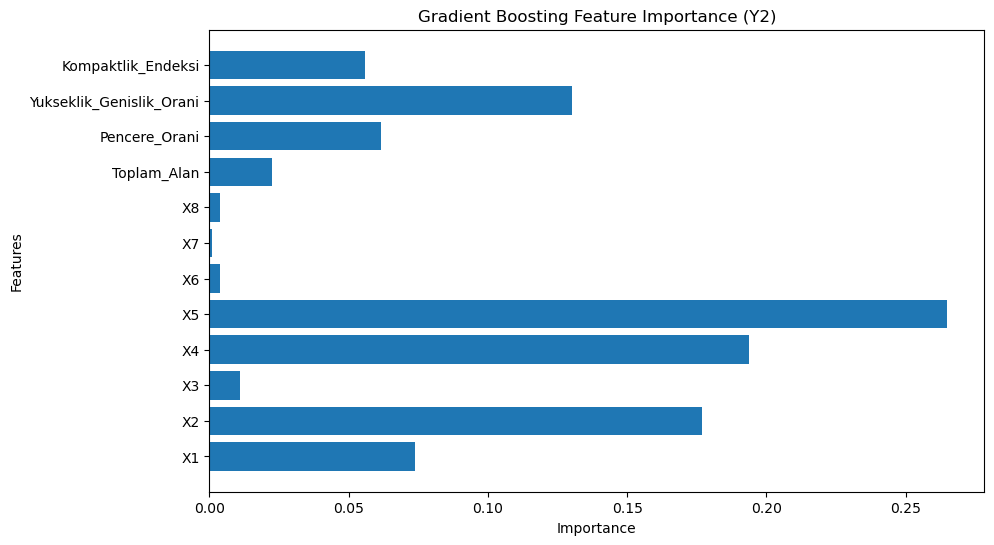

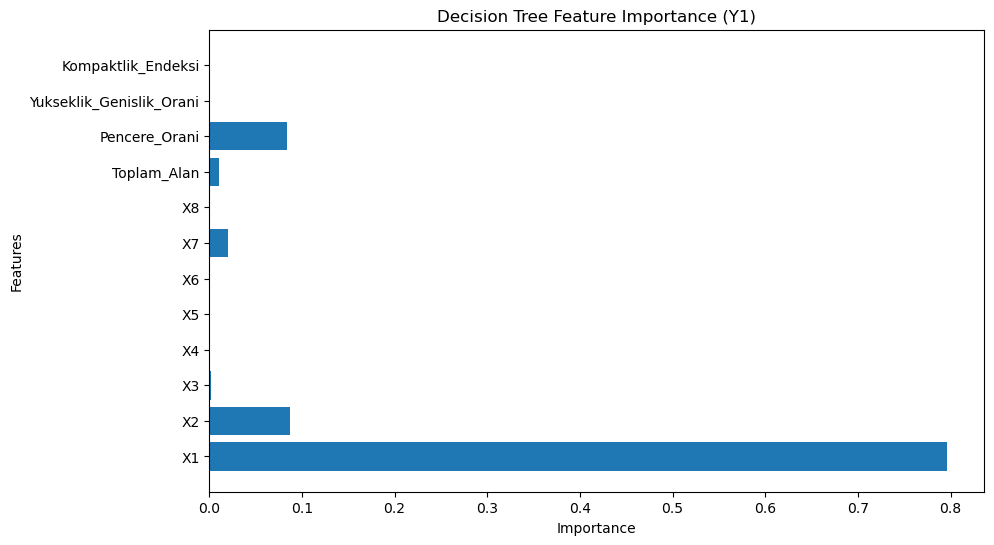

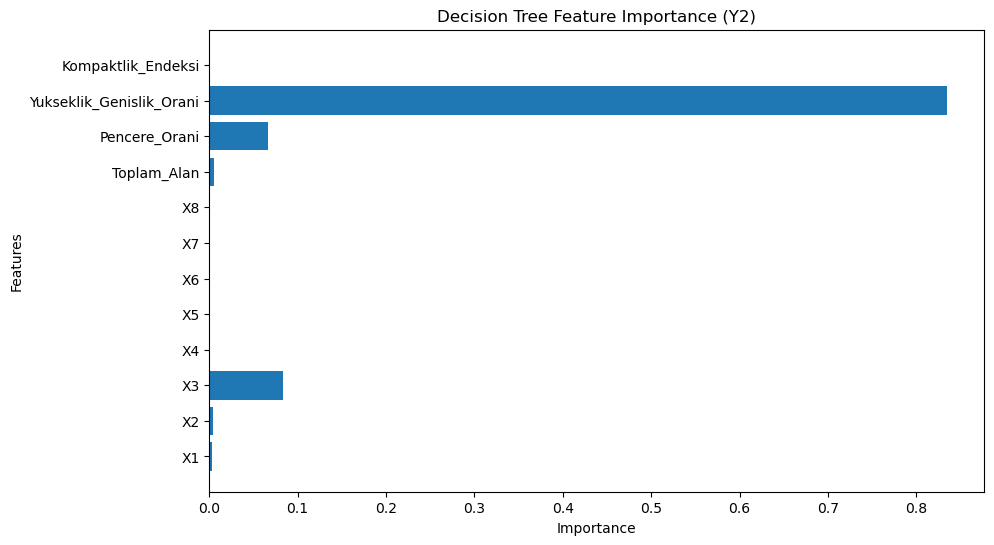

In [66]:

# Random Forest Feature Importance
rf_importance_y1 = rf_model_y1.feature_importances_
rf_importance_y2 = rf_model_y2.feature_importances_

# Gradient Boosting Feature Importance
gbr_importance_y1 = gbr_model_y1.feature_importances_
gbr_importance_y2 = gbr_model_y2.feature_importances_

# Decision Tree Feature Importance
dtr_importance_y1 = dtr_model_y1.feature_importances_
dtr_importance_y2 = dtr_model_y2.feature_importances_

# Görselleştirme
features = X_scaled_all_df.columns

# Random Forest Feature Importance Plot
plt.figure(figsize=(10, 6))
plt.barh(features, rf_importance_y1)
plt.title("Random Forest Feature Importance (Y1)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(features, rf_importance_y2)
plt.title("Random Forest Feature Importance (Y2)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Gradient Boosting Feature Importance Plot
plt.figure(figsize=(10, 6))
plt.barh(features, gbr_importance_y1)
plt.title("Gradient Boosting Feature Importance (Y1)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(features, gbr_importance_y2)
plt.title("Gradient Boosting Feature Importance (Y2)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Decision Tree Feature Importance Plot
plt.figure(figsize=(10, 6))
plt.barh(features, dtr_importance_y1)
plt.title("Decision Tree Feature Importance (Y1)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(features, dtr_importance_y2)
plt.title("Decision Tree Feature Importance (Y2)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [67]:
# Performans metriklerini bir sözlükte saklamak için
model_scores = {
    'Decision Tree Regression (Y1)': {'r2': dtr_r2_y1, 'mse': dtr_mse_y1, 'rmse': dtr_rmse_y1, 'mae': dtr_mae_y1},
    'Decision Tree Regression (Y2)': {'r2': dtr_r2_y2, 'mse': dtr_mse_y2, 'rmse': dtr_rmse_y2, 'mae': dtr_mae_y2},
    'Random Forest Regression (Y1)': {'r2': rf_r2_y1, 'mse': rf_mse_y1, 'rmse': rf_rmse_y1, 'mae': rf_mae_y1},
    'Random Forest Regression (Y2)': {'r2': rf_r2_y2, 'mse': rf_mse_y2, 'rmse': rf_rmse_y2, 'mae': rf_mae_y2},
    'Support Vector Regression (Y1)': {'r2': svr_r2_y1, 'mse': svr_mse_y1, 'rmse': svr_rmse_y1, 'mae': svr_mae_y1},
    'Support Vector Regression (Y2)': {'r2': svr_r2_y2, 'mse': svr_mse_y2, 'rmse': svr_rmse_y2, 'mae': svr_mae_y2},
    'Gradient Boosting Regression (Y1)': {'r2': gbr_r2_y1, 'mse': gbr_mse_y1, 'rmse': gbr_rmse_y1, 'mae': gbr_mae_y1},
    'Gradient Boosting Regression (Y2)': {'r2': gbr_r2_y2, 'mse': gbr_mse_y2, 'rmse': gbr_rmse_y2, 'mae': gbr_mae_y2},
}

# En iyi R-kare değerine sahip modeli bulma
best_model = max(model_scores, key=lambda k: model_scores[k]['r2'])

# En iyi modeli yazdırma
print(f"En iyi performans gösteren model (R-kare): {best_model}")


En iyi performans gösteren model (R-kare): Random Forest Regression (Y1)


## 6. Model Optimizasyonu

In [71]:
# Hiperparametre aralıkları
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Random Search ile Random Forest optimizasyonu
random_search = RandomizedSearchCV(
    estimator=rf_model_y1,
    param_distributions=param_dist,
    n_iter=50,  # 50 farklı kombinasyon dene
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_y1, y_train_y1)

# En iyi hiperparametreler
print("En iyi hiperparametreler Y1:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
En iyi hiperparametreler Y1: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}


In [76]:
# Optimize edilmiş modelleri oluştur
best_rf_model_y1 = random_search.best_estimator_
best_rf_model_y2 = random_search.best_estimator_  # y2 için yeni model oluşturuluyor

# Modelleri eğit
best_rf_model_y1.fit(X_train_y1, y_train_y1)
best_rf_model_y2.fit(X_train_y2, y_train_y2)

# Test setindeki performansı
optimized_y1_pred = best_rf_model_y1.predict(X_test_y1)
optimized_y2_pred = best_rf_model_y2.predict(X_test_y2)

# Performans metriklerini hesapla
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# y1 için
optimized_r2_y1 = r2_score(y_test_y1, optimized_y1_pred)
optimized_mse_y1 = mean_squared_error(y_test_y1, optimized_y1_pred)
optimized_rmse_y1 = np.sqrt(optimized_mse_y1)
optimized_mae_y1 = mean_absolute_error(y_test_y1, optimized_y1_pred)

# y2 için
optimized_r2_y2 = r2_score(y_test_y2, optimized_y2_pred)
optimized_mse_y2 = mean_squared_error(y_test_y2, optimized_y2_pred)
optimized_rmse_y2 = np.sqrt(optimized_mse_y2)
optimized_mae_y2 = mean_absolute_error(y_test_y2, optimized_y2_pred)

# Sonuçları yazdır
print(f"Optimize Edilmiş Model - y1 için: R²: {optimized_r2_y1:.4f}, MSE: {optimized_mse_y1:.4f}, RMSE: {optimized_rmse_y1:.4f}, MAE: {optimized_mae_y1:.4f}")
print(f"Optimize Edilmiş Model - y2 için: R²: {optimized_r2_y2:.4f}, MSE: {optimized_mse_y2:.4f}, RMSE: {optimized_rmse_y2:.4f}, MAE: {optimized_mae_y2:.4f}")


Optimize Edilmiş Model - y1 için: R²: 0.9273, MSE: 7.5815, RMSE: 2.7535, MAE: 2.4045
Optimize Edilmiş Model - y2 için: R²: 0.9647, MSE: 3.2727, RMSE: 1.8091, MAE: 1.1325


## 7. Sonuçların Karşılaştırılması

In [79]:
# Performans metriklerini tabloya ekleme
performance_data = {
    'Model': ['Decision Tree', 'Random Forest', 'SVR', 'Gradient Boosting', 'Optimized Random Forest'],
    'Y1 - R²': [dtr_r2_y1, rf_r2_y1, svr_r2_y1, gbr_r2_y1, optimized_r2_y1],
    'Y1 - MSE': [dtr_mse_y1, rf_mse_y1, svr_mse_y1, gbr_mse_y1, optimized_mse_y1],
    'Y1 - RMSE': [dtr_rmse_y1, rf_rmse_y1, svr_rmse_y1, gbr_rmse_y1, optimized_rmse_y1],
    'Y1 - MAE': [dtr_mae_y1, rf_mae_y1, svr_mae_y1, gbr_mae_y1, optimized_mae_y1],
    'Y2 - R²': [dtr_r2_y2, rf_r2_y2, svr_r2_y2, gbr_r2_y2, optimized_r2_y2],
    'Y2 - MSE': [dtr_mse_y2, rf_mse_y2, svr_mse_y2, gbr_mse_y2, optimized_mse_y2],
    'Y2 - RMSE': [dtr_rmse_y2, rf_rmse_y2, svr_rmse_y2, gbr_rmse_y2, optimized_rmse_y2],
    'Y2 - MAE': [dtr_mae_y2, rf_mae_y2, svr_mae_y2, gbr_mae_y2, optimized_mae_y2],
}

# Performans tablosu oluşturma
performance_df = pd.DataFrame(performance_data)

# Tablonun tamamını yazdırma
print(performance_df)


                     Model   Y1 - R²  Y1 - MSE  Y1 - RMSE  Y1 - MAE   Y2 - R²  \
0            Decision Tree  0.991329  0.903828   0.950699  0.628723  0.958306   
1            Random Forest  0.997826  0.226581   0.476005  0.340607  0.964225   
2                      SVR  0.927242  7.583733   2.753858  1.849753  0.891483   
3        Gradient Boosting  0.997591  0.251132   0.501131  0.390564  0.977933   
4  Optimized Random Forest  0.927264  7.581491   2.753451  2.404485  0.964679   

    Y2 - MSE  Y2 - RMSE  Y2 - MAE  
0   3.863234   1.965511  1.248692  
1   3.314780   1.820654  1.137203  
2  10.054894   3.170945  2.054842  
3   2.044642   1.429910  0.981240  
4   3.272709   1.809063  1.132469  


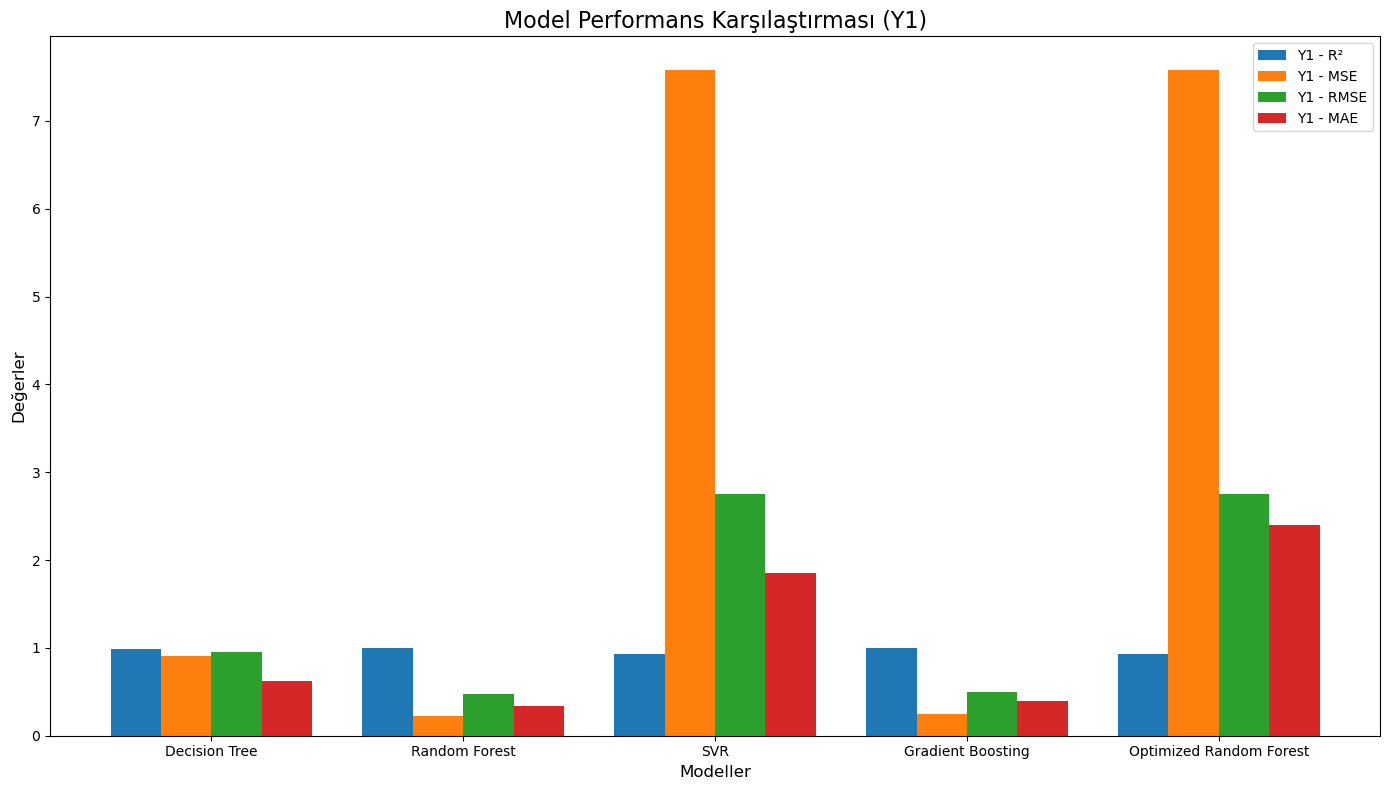

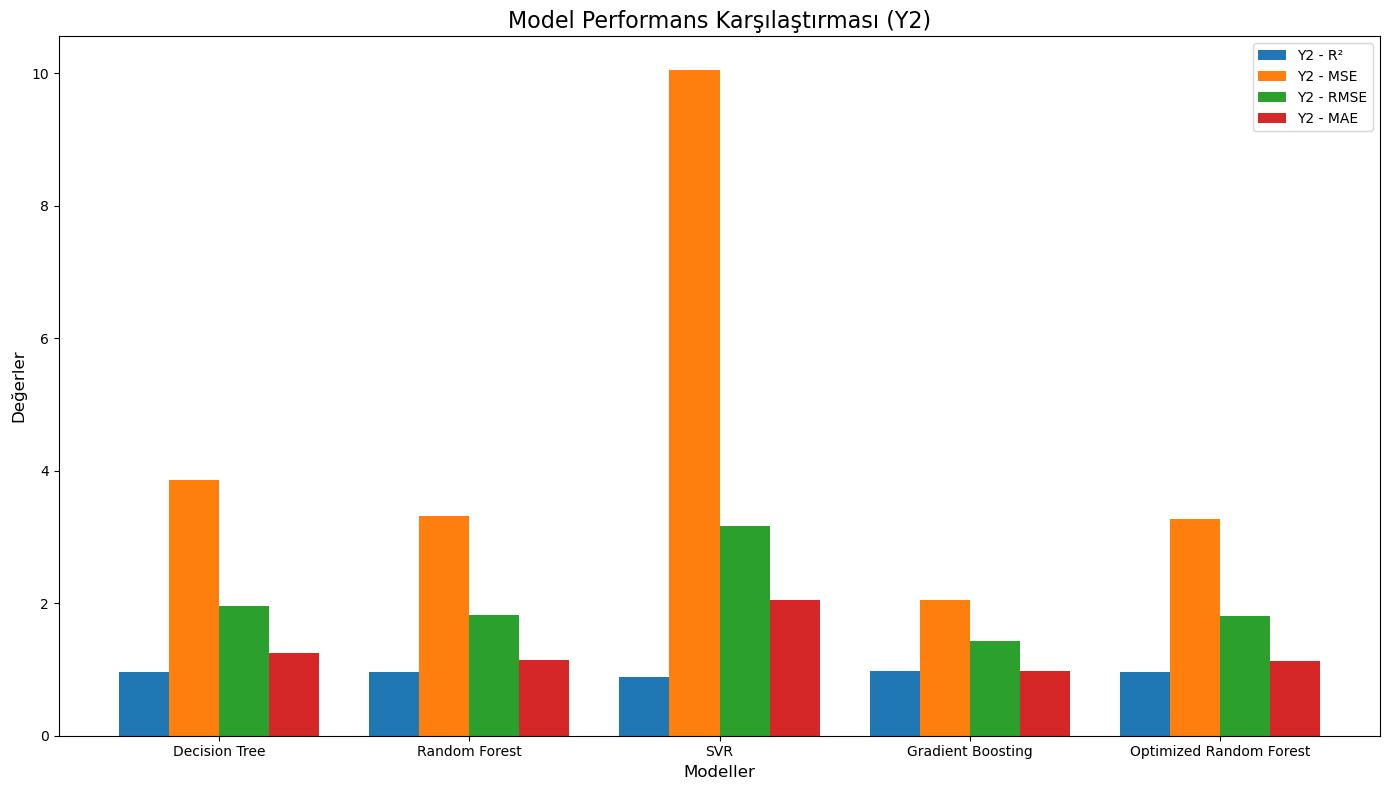

In [81]:

# Veriler
models = performance_df['Model']
metrics_y1 = ['Y1 - R²', 'Y1 - MSE', 'Y1 - RMSE', 'Y1 - MAE']
metrics_y2 = ['Y2 - R²', 'Y2 - MSE', 'Y2 - RMSE', 'Y2 - MAE']

# Bar genişliği ve x konumu ayarları
bar_width = 0.2
x = np.arange(len(models))

# Y1 metrikleri için bar grafikleri
plt.figure(figsize=(14, 8))
for i, metric in enumerate(metrics_y1):
    plt.bar(x + i * bar_width, performance_df[metric], bar_width, label=f"{metric}")

# X ekseni ayarları
plt.xticks(x + bar_width * (len(metrics_y1) - 1) / 2, models)
plt.title('Model Performans Karşılaştırması (Y1)', fontsize=16)
plt.xlabel('Modeller', fontsize=12)
plt.ylabel('Değerler', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Y2 metrikleri için bar grafikleri
plt.figure(figsize=(14, 8))
for i, metric in enumerate(metrics_y2):
    plt.bar(x + i * bar_width, performance_df[metric], bar_width, label=f"{metric}")

# X ekseni ayarları
plt.xticks(x + bar_width * (len(metrics_y2) - 1) / 2, models)
plt.title('Model Performans Karşılaştırması (Y2)', fontsize=16)
plt.xlabel('Modeller', fontsize=12)
plt.ylabel('Değerler', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()
